# Seaborn Practice 
The goal for this notebook is to do some data exploration with one of the seaborn datasets. 

I love penguins so I'm super excited to explore this dataset

In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# how to see all the seaborn datasets
print (sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
# import penguins dataset as penguins
penguins = sns.load_dataset('penguins')

In [4]:
# create custom color palette that is penguin inspired
# color palette source https://www.schemecolor.com/world-penguin-day-theme-colors.php
peng_palette = ['#D0894B', '#D9B45D', '#253542', '#2B4753', '#DBE3E5', '#F6F6F6']
# set style to dark and use custom palette
sns.set_theme(style = 'darkgrid', palette = peng_palette)

I found this Kaggle resource that I am looking through while exploring the data (https://www.kaggle.com/parulpandey/penguin-dataset-the-new-iris)

In [5]:
# There are 7 columns. Species, island, bill length, bill, depth, flipper length, body mass, sex 
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguins.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [7]:
# I saw this on the afore mentioned kaggle site. This is the credit that author gave.
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

# NOTE I should put this function in my custom functions.py when I get around to compiling it all. 

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(penguins)

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
bill_length_mm,2,0.6
bill_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


The 3 different types of species Adelie, Gentoo, Chinstrap, in this dataset are different types of penguins.
So it would be reasonable to assume (I don't have the docs for this dataset) that these are measurements of specific penguins of those three species. They measured their bills, and wings, and recored their weight and sex. Also what Island they were on. 

In [9]:
#there are 3 different types of species Adelie, Gentoo, Chinstrap
# place value_counts in a variable (series)
types_of_penguins = penguins['species'].value_counts()
types_of_penguins

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [10]:
# types of penguins is a series
type(types_of_penguins)

pandas.core.series.Series

In [11]:
# 114.67
mean_num_of_species = types_of_penguins.mean()

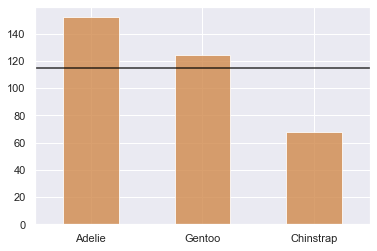

In [12]:
# use pandas plot.bar function to get quick plot to visually see the difference in amount of differnt penguins in dataframe
types_of_penguins.plot.bar(rot = 0, alpha = 0.8)

plt.axhline(mean_num_of_species, c = 'black', alpha = .8)
plt.show()

In [13]:
# the break down of penguin measured on what Islands (species and island cross section to come) 
islands_series = penguins['island'].value_counts()
islands_series

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [14]:
#average number of penguin entries per island 
islands_series.mean()

114.66666666666667

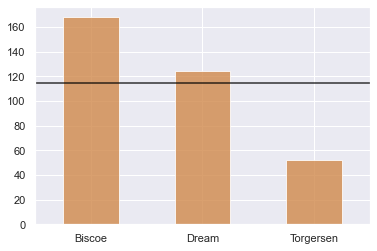

In [15]:
islands_series.plot.bar(rot = 0, alpha = 0.8)
plt.axhline(islands_series.mean(), c = 'black', alpha = 0.8)

plt.show()

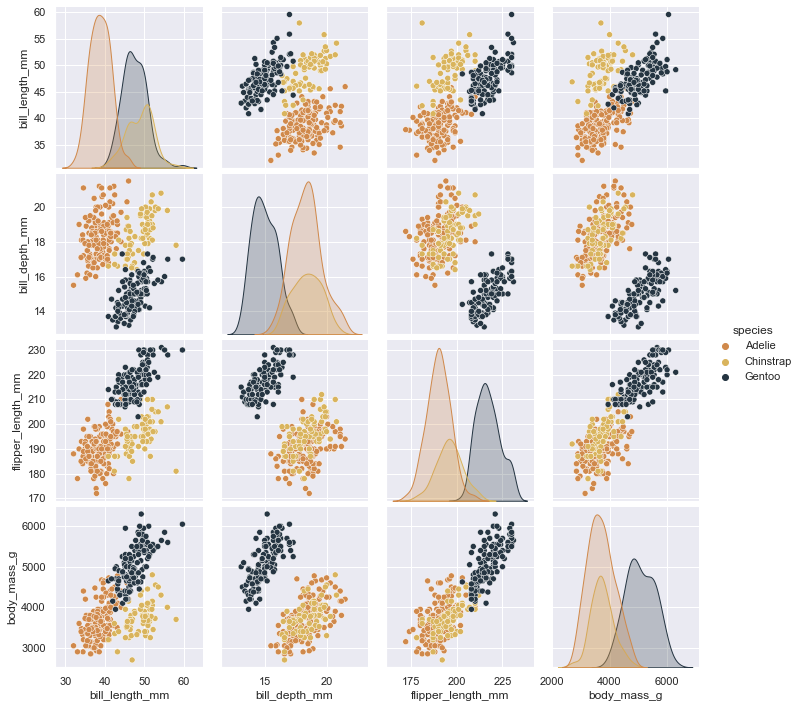

In [16]:
sns.pairplot(penguins, hue = 'species') 

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

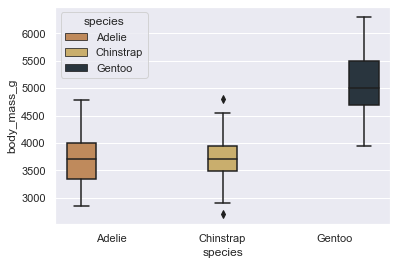

In [17]:
# how big are the penguins by species
sns.boxplot(data = penguins, hue = 'species', x = 'species', y = 'body_mass_g')

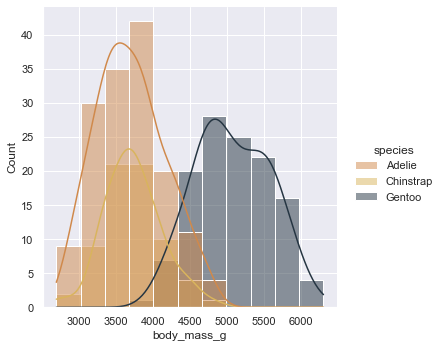

In [18]:
sns.displot(data = penguins, hue = 'species',  x = 'body_mass_g', kde = True)

#### Takeaway: The Gentoo penguins are on average much larger than the Adelie and Chinstrap penguins. This is easier to see on the box plot
- Questions to ask: 
    - Breakdown of penguins per island
    - is there a difference in size between penguins on different islands? Access to food?

<AxesSubplot:xlabel='island', ylabel='Count'>

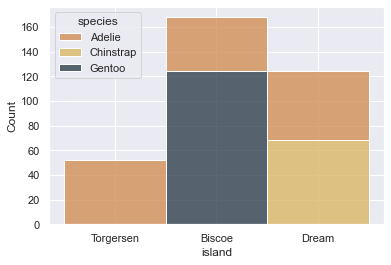

In [19]:
# break down of penguin species per island
sns.histplot(data = penguins, x = 'island', hue = 'species', multiple = 'stack')

#### Takeaways:  <a id='island_part'></a>
- Adelie penguins in the study were on all three islands (Torgersen, Biscoe, Dream)
    - Are they the only type of penguin on multiple islands?
    - Do they get along with other types of penguins
    - Was this just a limitation of the study? 
- Gentoo penguins only had measurements taken on Biscoe Island
- Chinstrap penguins were only observed (aka taken measurements of) on Dream island

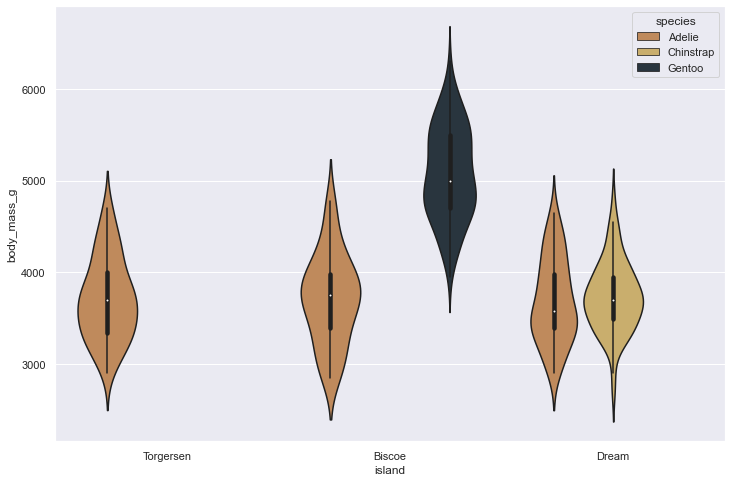

In [20]:
# violin plot of breakdown of penguin type by island, Island doesnt seem to have an impact on the size of the penguin
plt.figure(figsize = (12, 8))
sns.violinplot(data = penguins, hue = 'species', x = 'island', y = 'body_mass_g')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='body_mass_g'>

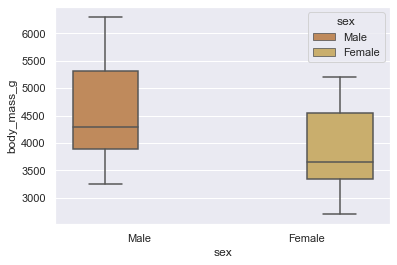

In [21]:
sns.boxplot(data = penguins, y = 'body_mass_g', x = 'sex', hue = 'sex')

Takeaways: male penguins are on average bigger than female penguins

In [22]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

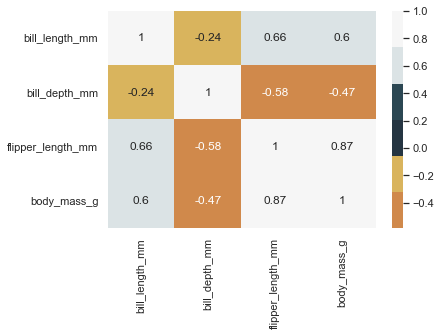

In [23]:
sns.heatmap(data = penguins.corr(), cmap = peng_palette, annot = True)

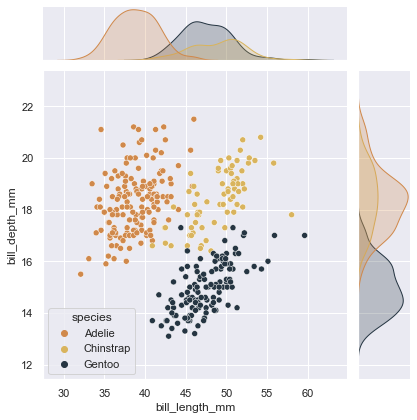

In [24]:
# markers = {"Female": "s", "Male": "X"}
sns.jointplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

In [25]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


[]

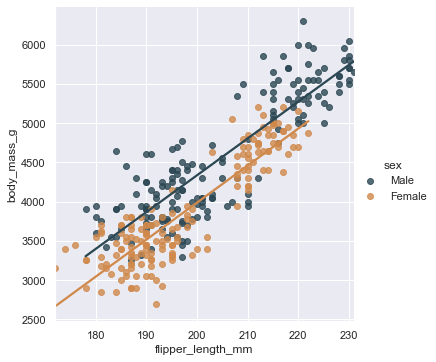

In [26]:
sns.lmplot(data = penguins, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'sex', palette = ['#2B4753', '#D0894B'], ci = 0)

plt.plot()

#### Takeaways: 
- There is a positive corelation between flipper length and body mass
- females are on average smaller than males but have the same corelation between flipper size and body mass



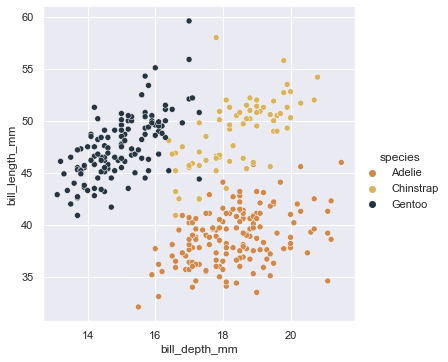

In [27]:
sns.relplot(data = penguins, x = 'bill_depth_mm', y = 'bill_length_mm', hue = 'species')

#### Takeaways:
- bill shape (length and depth) seem to be very particular to the species. 
- Gentoo have longer beaks but the thinnest up and down (see link below)
- chinstrap have the largest (long and tall)
- and the adelie seem to have the shortest beaks but wide up and down
- Reference for the width and depth of bill
- https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png

### Cleaning up the Data

In [28]:
# tidy data 
# get rid of nulls
# clean up species (get dummies)
# clean up column names

# use any, and is null to create a mask
nulls  = penguins.isnull().any(axis = 1)
# plug that into the dataframe to see all the oclumns with nulls
penguins[nulls]

# Will drop rows 3 and 339, not enough data 
# Decide to drop rows or not use sex as an feature. 


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [29]:
missing_values_table(penguins)

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
bill_length_mm,2,0.6
bill_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [30]:
# model to look at penguin features and figure out which penguin is what species
# TARGET: Species
    # TODO: clean up column to be number (ask about multi class? 1 2 and 3)
    # maybe this will get answered when we do the stuff with iris
# Feature Selection
# Won't use island as a feature, see island species break down above. 
# bill_length (mm), bill_depth (mm), flipper_length (mm), body_mass (g) (How to scale?) <----


In [31]:
# drop island and sex columns
penguins_clean = penguins.drop(columns=['island', 'sex'])
penguins_clean.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


In [32]:
# create dictionary of old column names, new names removed the measurements
col_names = {'bill_length_mm': 'bill_length', 
             'bill_depth_mm': 'bill_depth', 
             'flipper_length_mm': 'flipper_length', 
             'body_mass_g': 'body_mass'}

# rename columns
penguins_clean = penguins_clean.rename(columns=col_names)
penguins_clean

,species,bill_length,bill_depth,flipper_length,body_mass
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [33]:
# drop the 2 rows that had null values (3 and 339)
penguins_clean = penguins_clean.dropna(axis=0)
penguins_clean

,species,bill_length,bill_depth,flipper_length,body_mass
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [34]:
penguins_clean.species.value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [35]:
# import test train split
from sklearn.model_selection import train_test_split

In [36]:
# clean and prep function
def prep_penguins(df, dropcols = True):
    # drop island and sex columns
    if dropcols == True: 
        penguins_clean = df.drop(columns=['island', 'sex'])
    
    # create dictionary of old column names, new names removed the measurements
    col_names = {'bill_length_mm': 'bill_length', 
                 'bill_depth_mm': 'bill_depth', 
                 'flipper_length_mm': 'flipper_length', 
                 'body_mass_g': 'body_mass'}

    # rename columns
    penguins_clean = penguins_clean.rename(columns=col_names)
    
    # drop the 2 rows that had null values (3 and 339)
    penguins_clean = penguins_clean.dropna(axis=0)
    
    # split data using sklearn train test split
    # 20% test 80% train_validate (70% train, 30% validate)
    train, test = train_test_split(penguins_clean, test_size=0.2, random_state=713, stratify=penguins_clean.species)
    train, validate = train_test_split(train, train_size=0.7, random_state=713, stratify=train.species)
    
    return train, validate, test

In [37]:
# test the prep function
train, validate, test = prep_penguins(sns.load_dataset('penguins'))
train.head(), validate.head(), test.head()

(       species  bill_length  bill_depth  flipper_length  body_mass
 75      Adelie         42.8        18.5           195.0     4250.0
 144     Adelie         37.3        16.8           192.0     3000.0
 87      Adelie         36.9        18.6           189.0     3500.0
 175  Chinstrap         50.6        19.4           193.0     3800.0
 226     Gentoo         45.4        14.6           211.0     4800.0,
        species  bill_length  bill_depth  flipper_length  body_mass
 240     Gentoo         50.2        14.3           218.0     5700.0
 173  Chinstrap         48.5        17.5           191.0     3400.0
 54      Adelie         34.5        18.1           187.0     2900.0
 90      Adelie         35.7        18.0           202.0     3550.0
 110     Adelie         38.1        16.5           198.0     3825.0,
        species  bill_length  bill_depth  flipper_length  body_mass
 225     Gentoo         46.5        13.5           210.0     4550.0
 280     Gentoo         45.3        13.8      

### Modeling

I realize some of the exploring that happened above happened before I train test and split. Just a note for posterity, I did the first part of this before we went through much of the data Science Pipeline process at Codeup. So let's get cracking with creating a multi class classification model for these penguins! 

What do I need to do: 
- Univariate Exploration 
- Bivariate Exploration 
    - I expect I'll find a lot of the things I found previously
    - Do some stats tests
- Prep and Clean data
    - Rename columns 
    - Scale data and only use measurements 
    - Because of the potential limitations of the study I'm going to not include Island as a characteristic for the model See that Exploration [here](#island_part)
- Model
    - Figure out how I want to evaluate the model 
    - Use models good for multi-class classification
    - Expect it to be pretty decent at distinguishing Gentoo penguins but there will probably be some overlap between the other two species
    

In [38]:
import prepare as p
import explore as e

In [39]:
# import dataset
df = sns.load_dataset('penguins')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [41]:
df.shape

(344, 7)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [43]:
# take a look at nulls
missing_values_table(df)

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,11,3.2
bill_length_mm,2,0.6
bill_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


species is a object


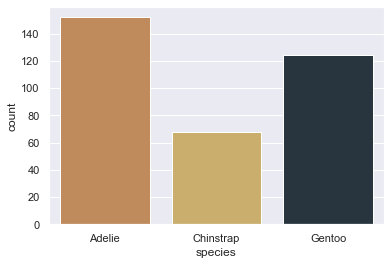

island is a object


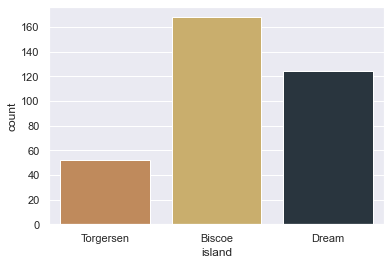

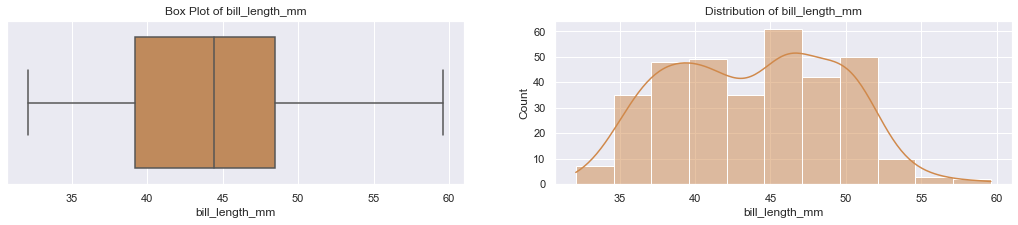

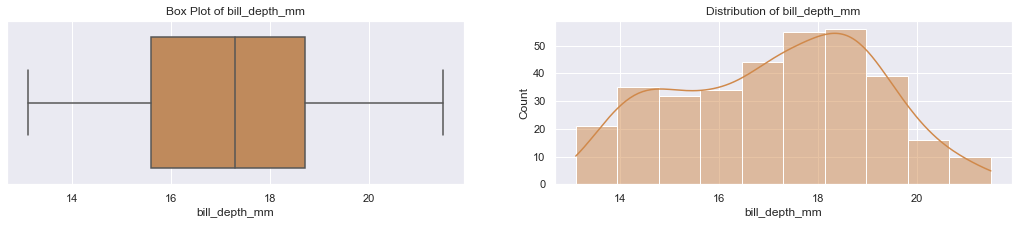

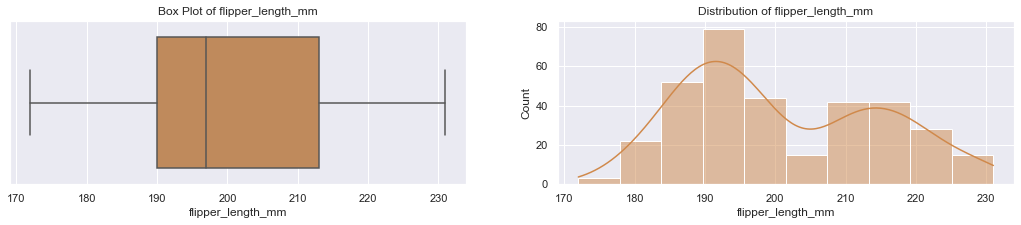

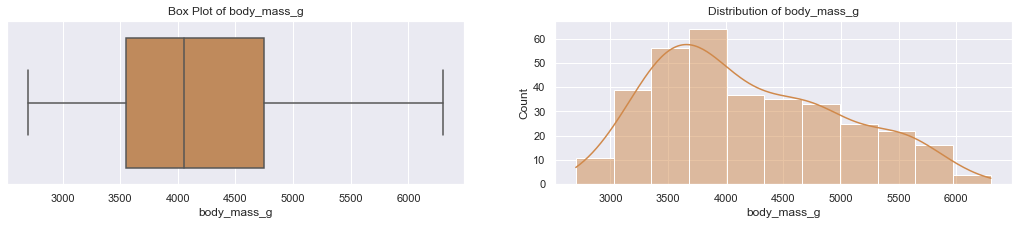

sex is a object


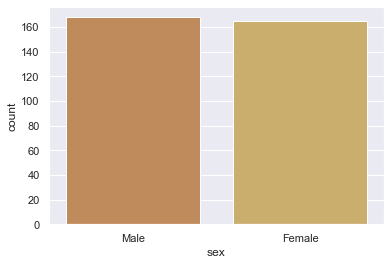

In [44]:
e.explore_univariate(df)

#### Takeaways Univariate Exploration
- There are a lot more Adelie Penguins than the other two species
- Also it looks like most of the penguins in the study were on Biscoe Island
- Seem to be an even number of Males and Females in the study
- None of the measurements seem normally distributed. Might be a different story when we break it down by species. 

### Bivariate/Multivariate Exploration
- Goals here to break down by species and find out what might be a good driver to predict species with a classification model. 
- Potential issues, because I need to split the data first, I won't have a lot of data to work with. I'll stratify based on Species first so at least I have the same proportions of penguin species in my train set.

In [45]:
# split in to train test validate

train, validate, test = p.prep_penguins(df)

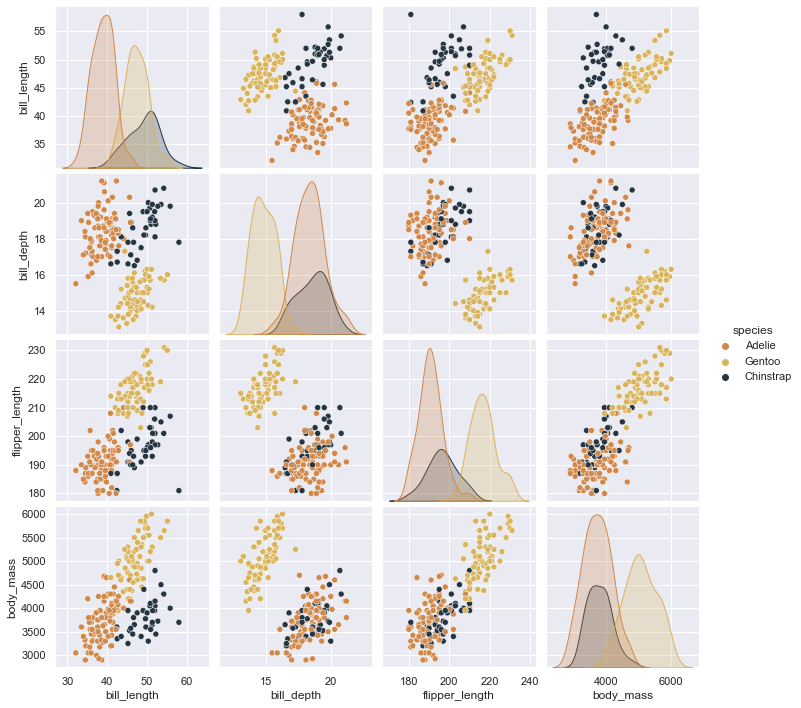

In [46]:
sns.pairplot(train, hue = 'species') 
plt.show()

#### Takeaways Pairplot
As Suspected the penguin measurements are more evenly distributed 

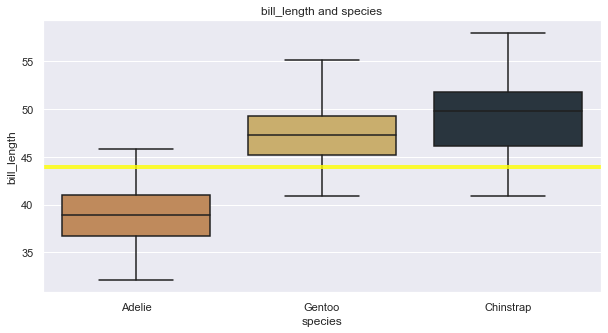

Overall mean for bill_length is: 43.92
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



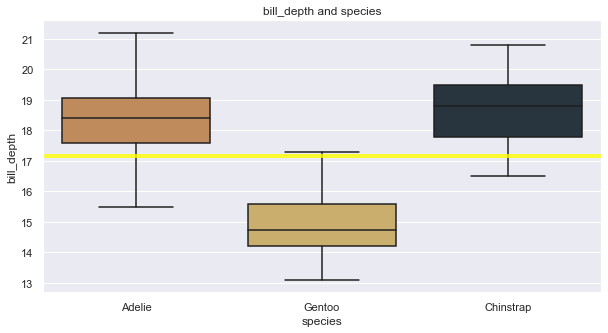

Overall mean for bill_depth is: 17.16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



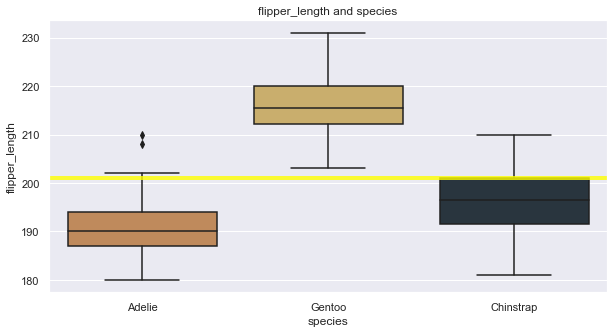

Overall mean for flipper_length is: 201.08
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



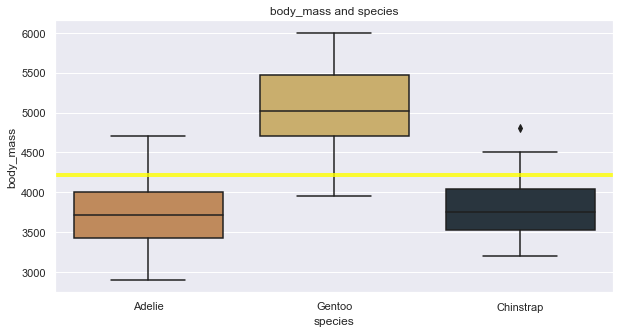

Overall mean for body_mass is: 4214.25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



In [47]:
# get list of variables that aren't objects
var_list = [col for col in list(train) if train[col].dtype != 'O']

# plot the box plots with the target, species, as the hue
e.plot_box_against_target(train, 'species', var_list, palette=peng_palette)

<AxesSubplot:>

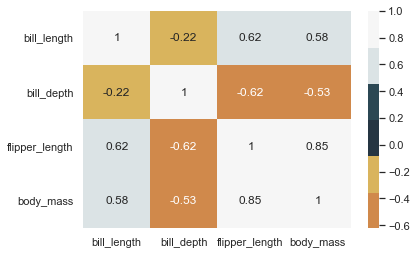

In [48]:
sns.heatmap(data = train.corr(), cmap = peng_palette, annot = True)

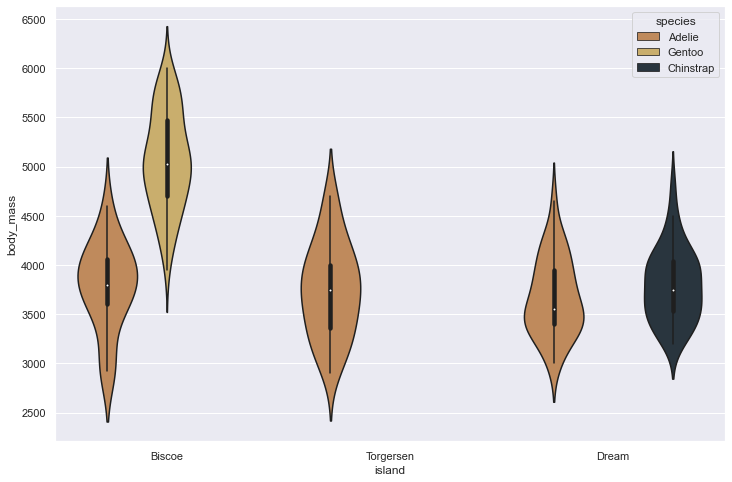

In [49]:
# violin plot of breakdown of penguin type by island, Island doesnt seem to have an impact on the size of the penguin
plt.figure(figsize = (12, 8))
sns.violinplot(data = train, hue = 'species', x = 'island', y = 'body_mass')
plt.show()

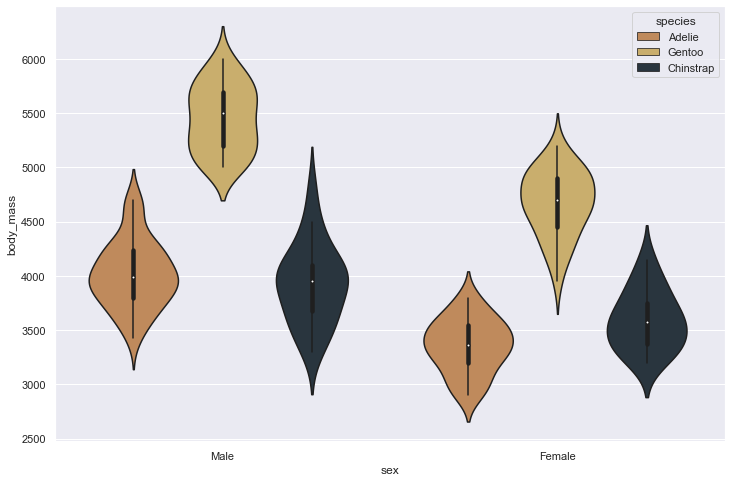

In [50]:
plt.figure(figsize = (12, 8))
sns.violinplot(data = train, hue = 'species', x = 'sex', y = 'body_mass')
plt.show()

### Island stuff
I'm going to try and predict what species of penguin it is based on the measurements and sex. Because the Sex of the penguin does have an impact on how large the penguin is I'm going to include that. but It would be really easy for the model to guess Adelie penguin if the island was Torgerson because those are the only penguins found on that Island. For that reason we're going to get rid of Island but keep the sex column. I'll have to scale the columns and encode the sex column. 

There are missing values in the sex column, I am going to give a shot imputing them before I get rid of it totally. 

In [51]:
train, validate, test = p.prep_penguins(df, explore = False)

In [52]:
train

,species,bill_length,bill_depth,flipper_length,body_mass,is_male
75,Adelie,42.8,18.5,195.0,4250.0,1
144,Adelie,37.3,16.8,192.0,3000.0,0
87,Adelie,36.9,18.6,189.0,3500.0,0
175,Chinstrap,50.6,19.4,193.0,3800.0,1
226,Gentoo,45.4,14.6,211.0,4800.0,0
...,...,...,...,...,...,...
227,Gentoo,46.7,15.3,219.0,5200.0,1
151,Adelie,41.5,18.5,201.0,4000.0,1
289,Gentoo,50.7,15.0,223.0,5550.0,1
192,Chinstrap,49.0,19.5,210.0,3950.0,1


In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
train.bill_length.dtypes

dtype('float64')

In [55]:
# scale the columns 
var_cols = [col for col in list(train) if train[col].dtypes == 'float']
mm_scaler, scaled_cols_list = p.my_scaler(train, validate, test, var_cols, MinMaxScaler(), 'mm')

Your scaled columns have been added to your train validate and test dataframes.
